# Twitter Analysis

## Import Library

In [8]:
import numpy as np
import pandas as pd
import re

from wordcloud import WordCloud
import nltk
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [9]:
from nltk.probability import FreqDist

In [10]:
import matplotlib.pyplot as plt

In [11]:
import IPython
IPython.display.set_matplotlib_formats("svg")

In [12]:
import seaborn as sns
sns.set()

## Load Dataset

In [67]:
raw_data = pd.read_csv("./data/tweet_tentang_lapor_dari_september2018.csv")
raw_data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,quote_url,video,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date
0,1178354284443758592,1178354284443758592,1569776528000,2019-09-30,00:02:08,WIB,712161361657114626,hengunawan0108,Agustinus Hendra Gunawan,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '712161361657114626', 'username':...",NaN
1,1178322545507885056,1178322545507885056,1569768961000,2019-09-29,21:56:01,WIB,1686118026,aselimandiri,pencari_keadilan,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1686118026', 'username': 'aselim...",NaN
2,1178187118566244352,1178187118566244352,1569736673000,2019-09-29,12:57:53,WIB,1165178906095181824,purwantopomah01,Purwanto,NaN,...,https://twitter.com/PurwantoPomah01/status/117...,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '1165178906095181824', 'username'...",NaN
3,1178187049079230464,1176504815209209856,1569736656000,2019-09-29,12:57:36,WIB,108215168,hafizpea,Hafiz Furqonul Aziz,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '108215168', 'username': 'hafizpe...",NaN
4,1178186289805287425,1176504815209209856,1569736475000,2019-09-29,12:54:35,WIB,108215168,hafizpea,Hafiz Furqonul Aziz,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,"[{'user_id': '108215168', 'username': 'hafizpe...",NaN


**Data Inspection**

In [14]:
raw_data.shape

(7622, 31)

In [15]:
raw_data.isna().sum()

id                    0
conversation_id       0
created_at            0
date                  0
time                  0
timezone              0
user_id               0
username              0
name                  1
place              7600
tweet                 0
mentions              0
urls                  0
photos                0
replies_count         0
retweets_count        0
likes_count           0
hashtags              0
cashtags              0
link                  0
retweet               0
quote_url          7198
video                 0
near               7622
geo                7622
source             7622
user_rt_id         7622
user_rt            7622
retweet_id         7622
reply_to              0
retweet_date       7622
dtype: int64

In [16]:
raw_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7622 entries, 0 to 7621
Data columns (total 31 columns):
id                 7622 non-null int64
conversation_id    7622 non-null int64
created_at         7622 non-null int64
date               7622 non-null object
time               7622 non-null object
timezone           7622 non-null object
user_id            7622 non-null int64
username           7622 non-null object
name               7621 non-null object
place              22 non-null object
tweet              7622 non-null object
mentions           7622 non-null object
urls               7622 non-null object
photos             7622 non-null object
replies_count      7622 non-null int64
retweets_count     7622 non-null int64
likes_count        7622 non-null int64
hashtags           7622 non-null object
cashtags           7622 non-null object
link               7622 non-null object
retweet            7622 non-null bool
quote_url          424 non-null object
video              7622 n

In [17]:
raw_data.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date'],
      dtype='object')

## Visualisasi trend per hari

In [19]:
raw_data["date"] = pd.to_datetime(raw_data["date"])

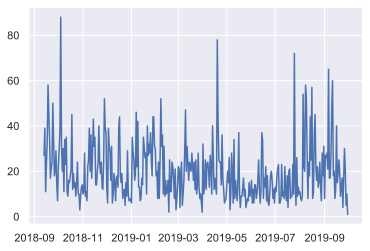

In [21]:
cnt_date = raw_data.date.value_counts()
sns.lineplot(x=cnt_date.index, y=cnt_date.values)

## Test wordcloud

In [22]:
from nltk.tokenize import wordpunct_tokenize

In [23]:
col_tweet = raw_data["tweet"]

In [24]:
str_all = ""
for i in col_tweet.index:
    str_all = str_all + col_tweet[i].lower()

In [25]:
hasil_tokenisasi = wordpunct_tokenize(text=str_all)

Hapus punctuation:

In [26]:
import string
hasil_tokenisasi = [hasil for hasil in hasil_tokenisasi if hasil not in list(string.punctuation)]

In [27]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

Hilangkan kata-kata tak bermakna:

In [28]:
stopwords.append("sdh")
stopwords.append("tdk")
stopwords.append("dgn")
stopwords.append("lapor1708")
stopwords.append("://")
stopwords.append("https")
stopwords.append("com")
stopwords.append("yg")
stopwords.append("twitter")
stopwords.append("pic")
stopwords.append("id")
stopwords.append("n")
stopwords.append("go")
stopwords.append("..")
stopwords.append("...")
stopwords.append("…")
stopwords.append("cc")
stopwords.append("pak")
stopwords.append("mau")

In [29]:
hasil_tokenisasi = [hasil for hasil in hasil_tokenisasi if not hasil in stopwords]

In [30]:
hasil_tokenisasi

['pln_123',
 'jokowi',
 'kementerianesdm',
 'pln',
 'sanggup',
 'melayani',
 'masyarakat',
 'baik',
 'bulan',
 'daerah',
 'duri',
 'pulo',
 'gambir',
 'jakarta',
 'pusat',
 '!!!!',
 'mati',
 'listrik',
 'sy',
 'ketik',
 'mati',
 'listriknya',
 'cuma',
 'wacana',
 'aja',
 'semuanya',
 'tetap',
 'aja',
 'gk',
 'profesional',
 'cicilan',
 '29x',
 'sisa',
 '7x',
 'pihak',
 'bfi',
 'memakai',
 'debt',
 'collector',
 'merampas',
 'kendaraan',
 'barang2',
 'dagangan',
 'didalam',
 'mobil',
 'apa',
 'kabar',
 'ojk',
 'ombudsmanri137',
 'kemenkumham_ri',
 'kemenkeuri',
 'beritamanado',
 'hati',
 'hati',
 'tarik',
 'kendaraan',
 'hampir',
 'lunas',
 'diduga',
 'menjadi',
 'modus',
 'bfi',
 'manado',
 'tipu',
 'konsumen',
 '…@',
 'laporgub_',
 'humas_resklaten',
 'pemkab_klaten',
 'kejariklaten',
 'purwantopomah01',
 'status',
 '1178141101221244929',
 'http',
 'paspor',
 'intersys',
 'pro',
 '/#',
 'top',
 'bukannya',
 'antrian',
 'online',
 'sy',
 'baru',
 'ganti',
 'paspor',
 'kjri',
 'johor',


In [31]:
wordcloud = WordCloud().generate_from_frequencies(dict(FreqDist(hasil_tokenisasi).items()))

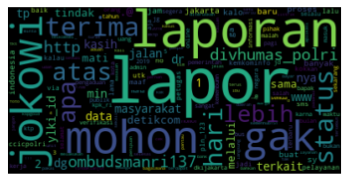

In [32]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [33]:
frekuensi_kata = list(FreqDist([hasil.lower() for hasil in hasil_tokenisasi]).items())
frekuensi_kata = pd.DataFrame(frekuensi_kata, columns=['Kata', 'Frekuensi'])
frekuensi_kata

,Kata,Frekuensi
0,pln_123,217
1,jokowi,702
2,kementerianesdm,28
3,pln,89
4,sanggup,4
...,...,...
22298,miliar,1
22299,propesional,1
22300,jnebekasitimur,1
22301,jne_bks,1


In [34]:
sorted_freq = frekuensi_kata.sort_values(by='Frekuensi', ascending=False)

In [35]:
res = sorted_freq.head(10)
res

,Kata,Frekuensi
161,lapor,1169
156,laporan,962
166,mohon,783
1,jokowi,702
218,gak,653
152,terima,513
66,status,489
154,atas,466
381,hari,457
43,apa,440


In [36]:
res.values

array([['lapor', 1169],
       ['laporan', 962],
       ['mohon', 783],
       ['jokowi', 702],
       ['gak', 653],
       ['terima', 513],
       ['status', 489],
       ['atas', 466],
       ['hari', 457],
       ['apa', 440]], dtype=object)

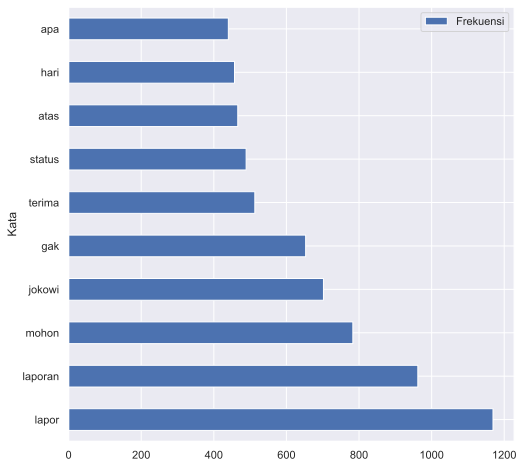

In [37]:
sorted_freq.head(10).plot.barh(x='Kata', y='Frekuensi', figsize=(8,8))

## Count

In [38]:
frekuensi_kata.values

array([['pln_123', 217],
       ['jokowi', 702],
       ['kementerianesdm', 28],
       ...,
       ['jnebekasitimur', 1],
       ['jne_bks', 1],
       ['jfv0yuora2', 1]], dtype=object)

In [39]:
res = frekuensi_kata.values
type(res)

numpy.ndarray

In [40]:
res[1][1]

702

In [41]:
list_words = [
    "jalan", "ktp", "air", "bersih", "sampah",
    "lubang", "saluran", "macet", "selokan",
    "kotor", "mampet", "banjir"
]

Ncounts = []
for w in list_words:
    #res = raw_data["tweet"].str.lower().str.contains(w).value_counts()
    for i in frekuensi_kata.index:
        if frekuensi_kata.Kata[i] == w:
            Ncounts.append(frekuensi_kata.values[i][1])

In [42]:
Ncounts

[287, 161, 104, 32, 40, 5, 14, 96, 10, 8, 3, 24]

In [43]:
num_kata_kunci = pd.Series(Ncounts, index=list_words)

In [44]:
num_kata_kunci

jalan      287
ktp        161
air        104
bersih      32
sampah      40
lubang       5
saluran     14
macet       96
selokan     10
kotor        8
mampet       3
banjir      24
dtype: int64

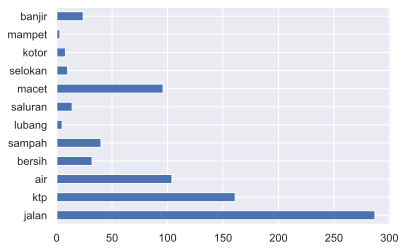

In [45]:
num_kata_kunci.plot.barh()

## Sentimen

In [49]:
import gensim
sentimen = pd.read_csv("../Text Mining 2/data/sentimen.csv")

In [69]:
raw_data["tweet2"] = raw_data["tweet"].apply(lambda x: gensim.utils.simple_preprocess(x)).copy()

In [70]:
for i,c in enumerate(raw_data.columns):
    print(i, " ", c)

0   id
1   conversation_id
2   created_at
3   date
4   time
5   timezone
6   user_id
7   username
8   name
9   place
10   tweet
11   mentions
12   urls
13   photos
14   replies_count
15   retweets_count
16   likes_count
17   hashtags
18   cashtags
19   link
20   retweet
21   quote_url
22   video
23   near
24   geo
25   source
26   user_rt_id
27   user_rt
28   retweet_id
29   reply_to
30   retweet_date
31   tweet2


In [71]:
analisa = raw_data.iloc[:,31:32]

In [72]:
analisa.explode("tweet2")

,tweet2
0,pln_
0,jokowi
0,lapor
0,kementerianesdm
0,pln
...,...
7621,pic
7621,twitter
7621,com
7621,jfv


In [74]:
sentimen.columns

Index(['kata', 'sentimen'], dtype='object')

**Tugas**

1. Carilah trend dari naik atau turunnya frekuensi tweet pada data berikut ini.
2. Dari data pada kolom 'tweet', visualisasikan kata-kata kunci yang ada dengan menggunakan wordcloud dan visualisasi top 10 kata kunci lainnya dengan menggunakan barchart
3. Lakukan ekstraksi tweet berdasarkan kata kunci berikut lalu visualkan setiap kata yang terkait dengan kata jalan dengan menggunakan wordcloud.
    - jalan
    - ktp
    - air
    - bersih
    - sampah
    - lubang
    - saluran
    - macet
    - selokan
    - kotor
    - mampet
    - banjir
4. Cek sentimen dari setiap tweet berdasarkan waktu.